# Rationale Statement

##### Startups may be small companies but they can play a significant role in economic growth. They create more jobs which means more employment, and more employment means an improved economy. Not only that, startups can also contribute to economic dynamism by spurring innovation and injecting competition. New entrepreneurs can bring new ideas to the table, much needed to stir innovation and generate competition.

### Some of the features in the dataset:
#### Labels: labels that these companies create for advertisement
#### city, zip_code, state_code, latitude, longitude : location information of the city that the company is located at
#### name, id : name and id of the company
#### founded_at, closed_at : date on which the company was found, date on which the company was closed
#### age_first_funding_year : age of company when it received its first funding 
#### age_last_funding_year : age of company when it received its first funding 
#### relationships : Contains relationship data that links companies to individuals and their positions.
#### milestones : Contains significant events within the startup ecosystem.
#### has_VC : has Venture capital
#### has_angel : has an angel Investor
#### has_roundA, has_roundB, has_roundC, has_roundD : rounds of funding
#### is_top500 : company listed as top 500?
#### category_code : category in which the business is in
#### status: Acquired if the company has been acrquired by some other company, closed if the company is closed

# Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
df = pd.read_csv('C:\\Users\\Shrita\\Downloads\\ongoing_projects\\Startup\\startup.csv')

In [2]:
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


## The dataset has 49 columns and 923 rows. However, I can see category_code column has been encoded(one hot encoded). 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [4]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

### Instead of having different columns for place of company, have one column only for visualization

In [5]:
a = 'California'
b = 'New York'
c= 'Texas'
d = 'Mississippi'
e = 'Others'
f = 0
df['Place_Company'] = np.where(df['is_CA']== 1, a, (np.where(df['is_NY']== 1, b, (np.where(df['is_TX']== 1, c, (np.where(df['is_MA']== 1, d, (np.where(df['is_otherstate']== 1, e,f)))))))))

In [6]:
df['Place_Company'].value_counts()

California     487
Others         204
New York       106
Mississippi     83
Texas           42
0                1
Name: Place_Company, dtype: int64

In [7]:
df = df[df['Place_Company'] != '0']

In [8]:
df['Place_Company'].value_counts()

California     487
Others         204
New York       106
Mississippi     83
Texas           42
Name: Place_Company, dtype: int64

### Removed all the null values in the recently created column, Place Company

###  Some of the columns have same information, so removing those columns and name and id columns

In [9]:
colsw = ['Unnamed: 0', 'state_code','latitude', 'longitude', 'zip_code', 'id','city', 'Unnamed: 6', 'name','state_code.1', 'is_CA', 'is_NY','is_MA', 'is_TX', 'is_otherstate','is_software','is_web', 'is_mobile', 'is_enterprise', 'is_advertising','is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 'object_id','closed_at']
df.drop(colsw,axis='columns', inplace=True)

# Renaming some of the columns

In [10]:
df = df.rename(columns = {'has_VC': 'Venture Capital?', 'has_angel': 'Angel Investor?','has_roundA':'Round A?','has_roundB':'Round B?','has_roundC':'Round C?','has_roundD':'Round D?'}, inplace = False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    922 non-null    int64  
 1   founded_at                922 non-null    object 
 2   first_funding_at          922 non-null    object 
 3   last_funding_at           922 non-null    object 
 4   age_first_funding_year    922 non-null    float64
 5   age_last_funding_year     922 non-null    float64
 6   age_first_milestone_year  770 non-null    float64
 7   age_last_milestone_year   770 non-null    float64
 8   relationships             922 non-null    int64  
 9   funding_rounds            922 non-null    int64  
 10  funding_total_usd         922 non-null    int64  
 11  milestones                922 non-null    int64  
 12  category_code             922 non-null    object 
 13  Venture Capital?          922 non-null    int64  
 14  Angel Inve

In [12]:
df.isnull().sum()

labels                        0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
Venture Capital?              0
Angel Investor?               0
Round A?                      0
Round B?                      0
Round C?                      0
Round D?                      0
avg_participants              0
is_top500                     0
status                        0
Place_Company                 0
dtype: int64

# Handling missing values

In [13]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean())

In [14]:
df

,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,Venture Capital?,Angel Investor?,Round A?,Round B?,Round C?,Round D?,avg_participants,is_top500,status,Place_Company
0,1,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,0,0,0,1.0000,0,acquired,California
1,1,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,...,1,0,0,1,1,1,4.7500,1,acquired,California
2,1,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,1,0,0,0,4.0000,1,acquired,California
3,1,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,...,0,0,0,1,1,1,3.3333,1,acquired,California
4,0,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,...,1,1,0,0,0,0,1.0000,1,closed,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,1/1/2009,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,...,0,0,1,0,0,0,6.0000,1,acquired,California
919,0,1/1/1998,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,...,1,0,0,1,0,0,2.6667,1,closed,Mississippi
920,0,1/1/1999,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,...,0,0,0,0,0,1,8.0000,1,closed,California
921,1,1/1/2009,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,...,0,0,1,1,0,0,1.0000,1,acquired,California


In [15]:
df.isnull().sum()

labels                        0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
Venture Capital?              0
Angel Investor?               0
Round A?                      0
Round B?                      0
Round C?                      0
Round D?                      0
avg_participants              0
is_top500                     0
status                        0
Place_Company                 0
dtype: int64

In [16]:
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean())

In [17]:
df.isnull().sum()

labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
category_code               0
Venture Capital?            0
Angel Investor?             0
Round A?                    0
Round B?                    0
Round C?                    0
Round D?                    0
avg_participants            0
is_top500                   0
status                      0
Place_Company               0
dtype: int64

In [18]:
df[df.isna().any(axis=1)]

,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,Venture Capital?,Angel Investor?,Round A?,Round B?,Round C?,Round D?,avg_participants,is_top500,status,Place_Company


### All the null values removed 

# Datetime Engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    922 non-null    int64  
 1   founded_at                922 non-null    object 
 2   first_funding_at          922 non-null    object 
 3   last_funding_at           922 non-null    object 
 4   age_first_funding_year    922 non-null    float64
 5   age_last_funding_year     922 non-null    float64
 6   age_first_milestone_year  922 non-null    float64
 7   age_last_milestone_year   922 non-null    float64
 8   relationships             922 non-null    int64  
 9   funding_rounds            922 non-null    int64  
 10  funding_total_usd         922 non-null    int64  
 11  milestones                922 non-null    int64  
 12  category_code             922 non-null    object 
 13  Venture Capital?          922 non-null    int64  
 14  Angel Inve

### founded_at, first_funding_at, last_funding_at cols are in object type. First we change that

In [20]:
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [21]:
df.shape

(922, 23)

### Extracting year from datetime column and creating another column

In [22]:
df['founded_at_year'] = df['founded_at'].dt.year
df['first_funding_at_year'] = df['first_funding_at'].dt.year
df['last_funding_at_year'] = df['last_funding_at'].dt.year

In [23]:
df.shape

(922, 26)

# Dropping duplicate columns

In [24]:
colsw = ['founded_at','first_funding_at','last_funding_at']
df.drop(colsw,axis='columns', inplace=True)

# Data analysis

In [25]:
df.shape

(922, 23)

In [26]:
df.columns

Index(['labels', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'Venture Capital?', 'Angel Investor?', 'Round A?', 'Round B?',
       'Round C?', 'Round D?', 'avg_participants', 'is_top500', 'status',
       'Place_Company', 'founded_at_year', 'first_funding_at_year',
       'last_funding_at_year'],
      dtype='object')

In [27]:
df['Place_Company'].value_counts()

California     487
Others         204
New York       106
Mississippi     83
Texas           42
Name: Place_Company, dtype: int64

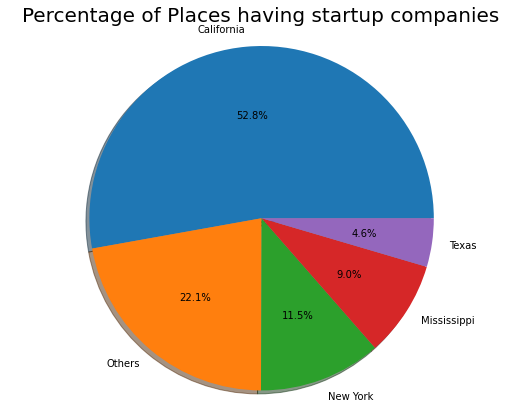

In [28]:
labels = ['California','Others','New York','Mississippi','Texas']
sizes = [df['Place_Company'].value_counts()[0],
         df['Place_Company'].value_counts()[1],
         df['Place_Company'].value_counts()[2],
         df['Place_Company'].value_counts()[3],
         df['Place_Company'].value_counts()[4],
        ]

# print(sizes) # adds up to 1433, which is the total number of participants

fig1 = plt.figure(figsize=(20,7))
ax1=fig1.add_subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Percentage of Places having startup companies', fontsize = 20)
ax1.axis('equal')


plt.show()

California is the place having maximum startup companies, followed by new york. Texas has the lowest percentage of all.

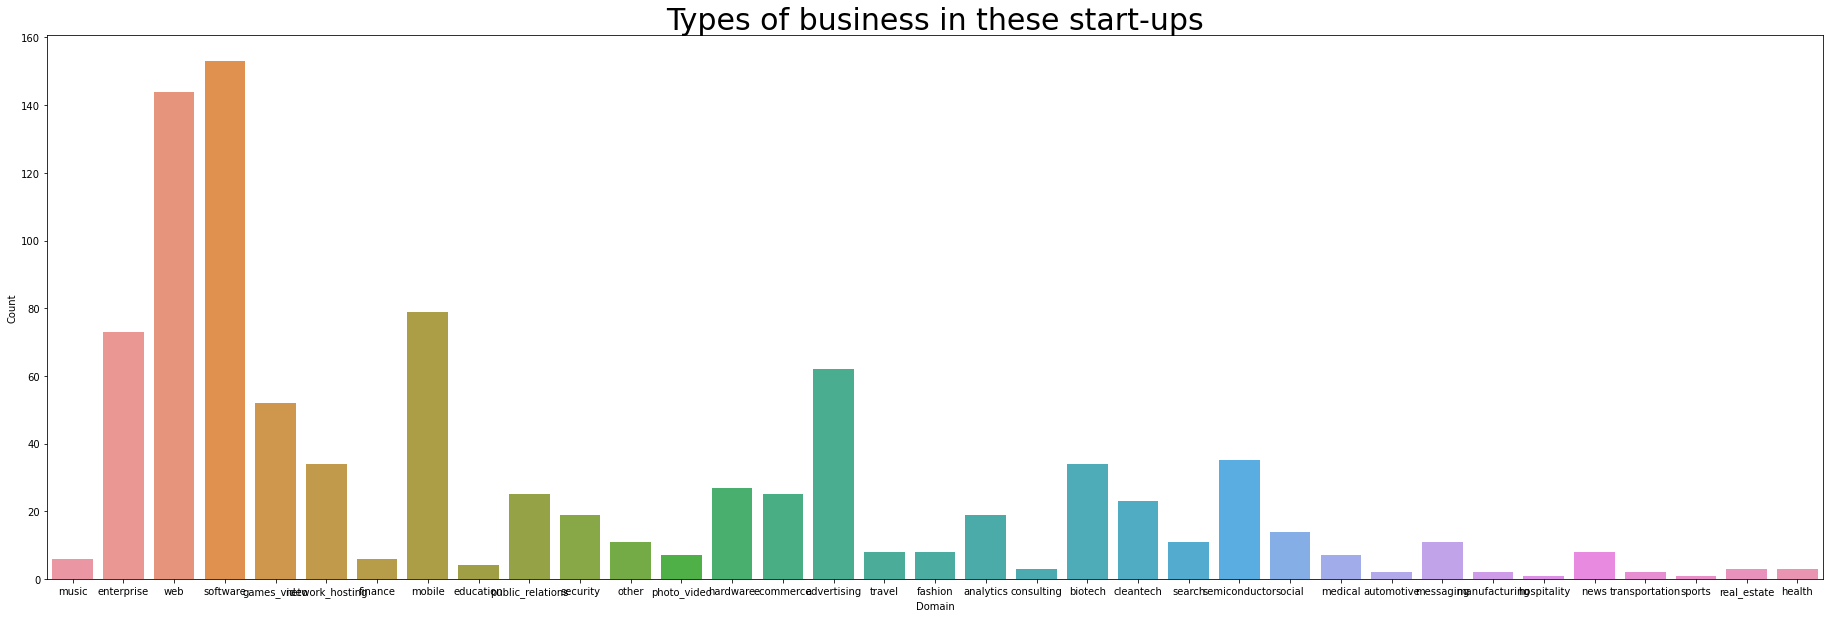

In [29]:
f= plt.figure(figsize=(70,10))

ax1=f.add_subplot(121)
b = sns.countplot(df['category_code'])
b.axes.set_title('Types of business in these start-ups', fontsize = 30)
b.set_xlabel('Domain', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)

plt.show()


Most popular domains in these start-ups are Computer Science(software, web development, mobile development) followed by enterprise and advertising. On the other hand, health, consulting, sports have lesser percentage of the data

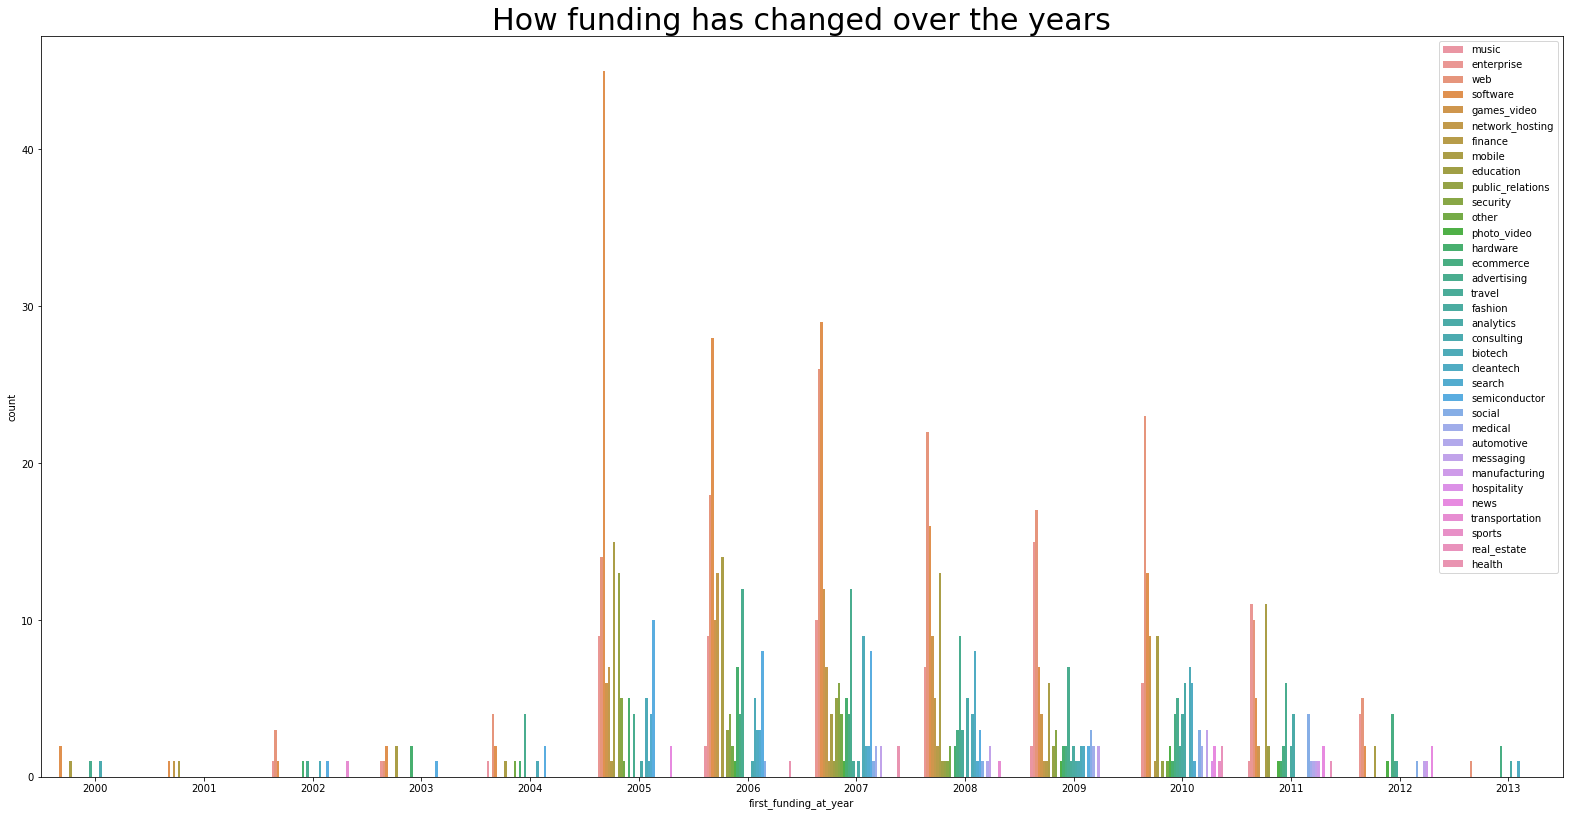

In [30]:
f= plt.figure(figsize=(60,30))

ax1=f.add_subplot(221)
sns.countplot(x='first_funding_at_year', hue="category_code", data=df)
plt.title('How funding has changed over the years', fontsize = 30)
ax1.legend(loc = 1)


plt.show()


The data shows that the funding was more active in the years 2005 to 2010. In 2005 2007 and 2009, web development had more funding whereas in 2006, software had more funding. Enterprise had more funding in 2008


In [31]:
df['status_new'] = df['status'].map({'acquired': 1, 'closed': 0})

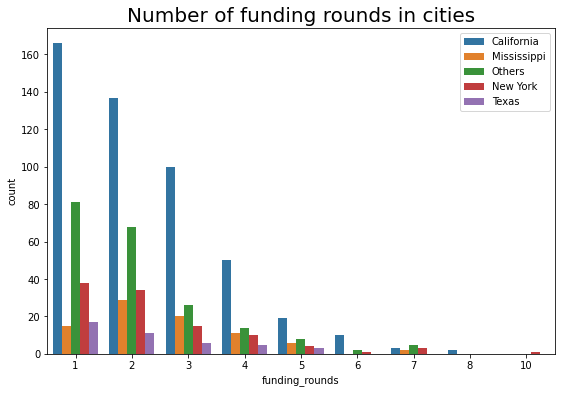

In [32]:
f= plt.figure(figsize=(20,6))

ax1=f.add_subplot(121)
sns.countplot(df['funding_rounds'], hue = df['Place_Company'])
plt.title('Number of funding rounds in cities', fontsize = 20)
ax1.legend(loc = 1)

Interesting observaion here is that, new york receives 10 rounds of funding and california receives 8 rounds of funding in small amounts. but five rounds of funding is common amongst all cities.

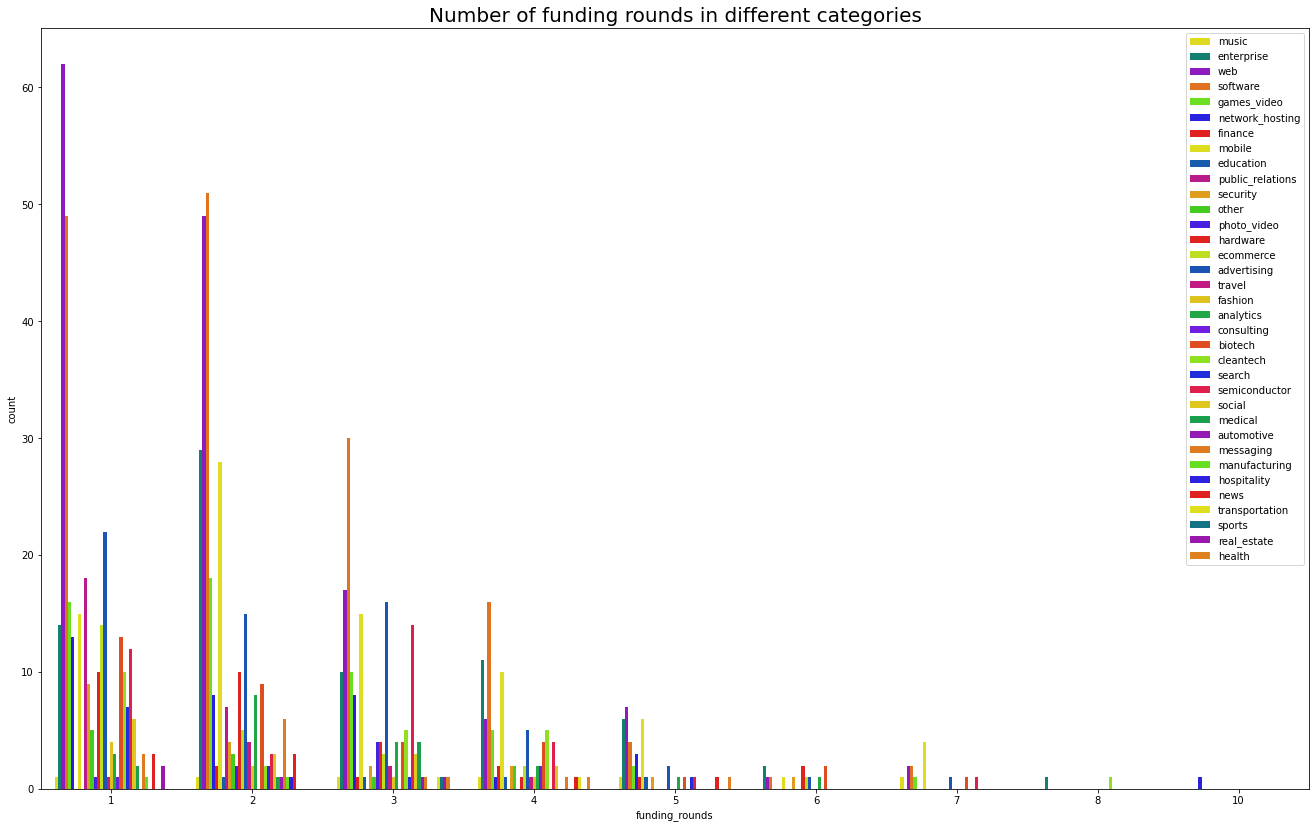

In [33]:
f= plt.figure(figsize=(50,14))

ax1=f.add_subplot(121)
sns.countplot(df['funding_rounds'], hue = df['category_code'], palette = 'prism')
plt.title('Number of funding rounds in different categories', fontsize = 20)
ax1.legend(loc = 1)

Network hosting sector received 10 rounds of funding but 10 rounds of funding is quite rare. Most commonly all sectors receive 6 rounds of funds. Music sector rarely has 2-3 eight rounds of funding

Text(0.5, 1.0, 'Does having a Venture Capital lead to success of a startup?')

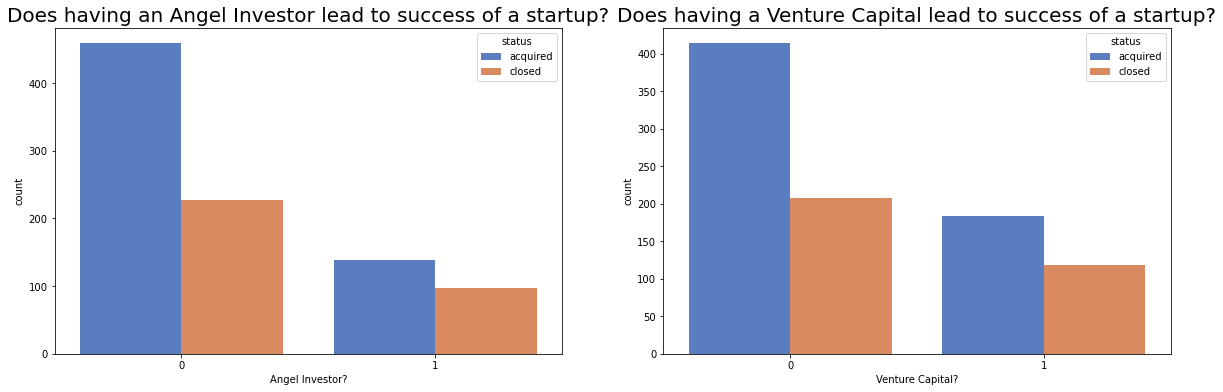

In [34]:
f= plt.figure(figsize=(20,6))

ax1=f.add_subplot(121)
sns.countplot(df['Angel Investor?'], hue = df['status'], palette = 'muted')
plt.title('Does having an Angel Investor lead to success of a startup?', fontsize = 20)
ax1=f.add_subplot(122)
sns.countplot(df['Venture Capital?'], hue = df['status'], palette = 'muted')
plt.title('Does having a Venture Capital lead to success of a startup?', fontsize = 20)

the columns are not helping the prediction, Removing these columns though would help the prediction

Text(0.5, 1.0, 'How does G1 change with G3(port)')

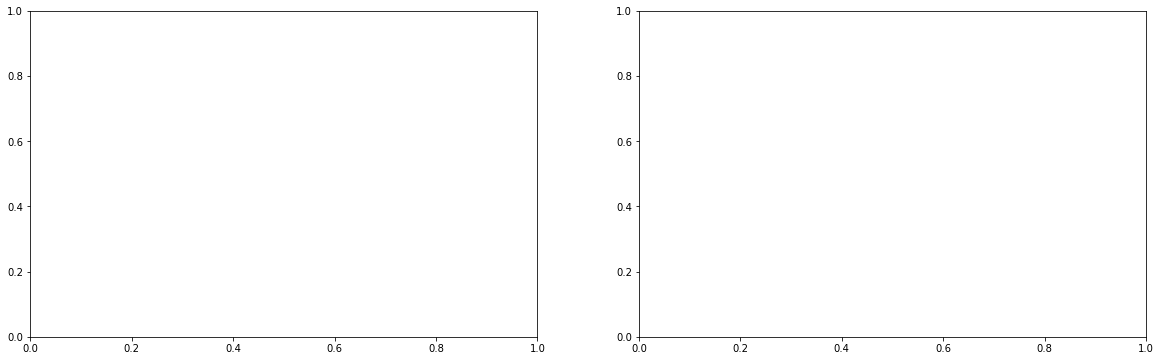

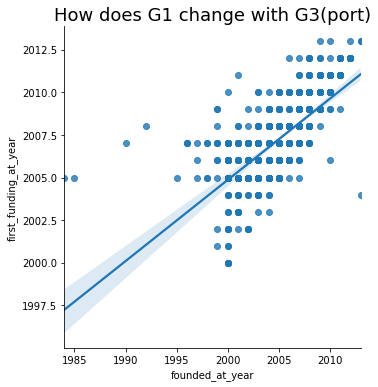

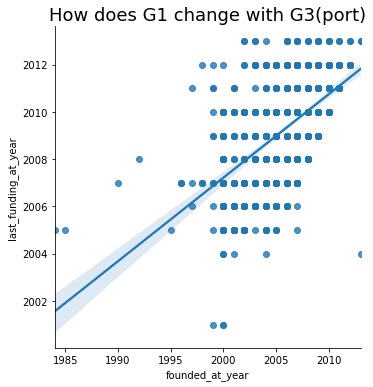

In [35]:
f= plt.figure(figsize=(20,6))

ax1=f.add_subplot(121)
sns.lmplot(data=df,
           x='founded_at_year',
           y="first_funding_at_year")
plt.title('How does G1 change with G3(port)', fontsize = 18)

ax1=f.add_subplot(122)
sns.lmplot(data=df,
           x='founded_at_year',
           y="last_funding_at_year")
plt.title('How does G1 change with G3(port)', fontsize = 18)

Since the year the startup company was founded the fundings they received have been increasing

# Outlier Analysis

<AxesSubplot:xlabel='relationships'>

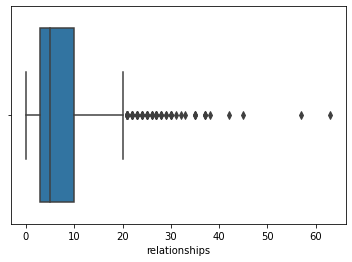

In [36]:
sns.boxplot(data=df, x='relationships')

<AxesSubplot:xlabel='avg_participants'>

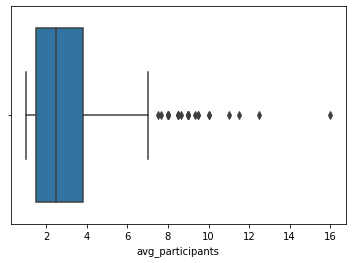

In [37]:
sns.boxplot(data=df, x='avg_participants')

In [38]:
df = df[df['relationships'] < 50]

In [39]:
df = df[df['avg_participants'] < 11]

<AxesSubplot:xlabel='relationships'>

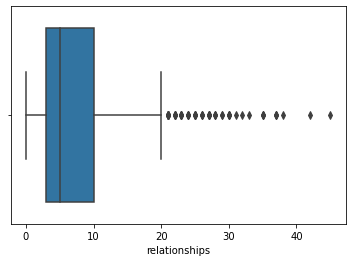

In [40]:
sns.boxplot(data=df, x='relationships')

<AxesSubplot:xlabel='avg_participants'>

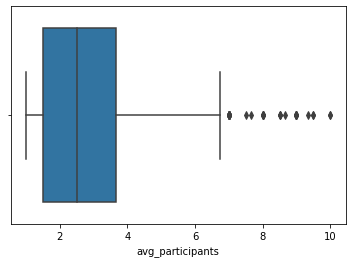

In [41]:
sns.boxplot(data=df, x='avg_participants')

# Feature Engineering and Feature Selection

## Label Enconding

In [42]:
categorical = ['category_code','status','Place_Company']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

# Best features selection

In [43]:
X = df.drop(['status','status_new'], axis=1)
y = df['status']

[0.81214714 0.00747786 0.00701548 0.0058839  0.00984069 0.01989386
 0.00884743 0.00688107 0.02368293 0.00491075 0.00321948 0.00336836
 0.00748644 0.01082615 0.00640538 0.00346402 0.00767306 0.02960958
 0.00509065 0.00695058 0.00430206 0.00502313]


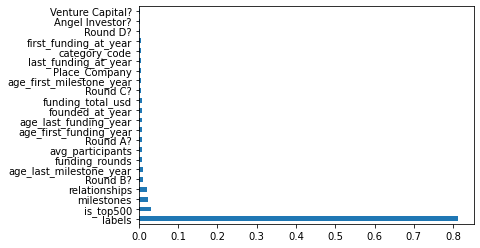

In [44]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

### Almost all of the features except labels have no strong correlation with the dependent variable. Removing some of the columns with very less correlation

In [45]:
colsw = ['Angel Investor?','Round D?','Round C?','Venture Capital?','last_funding_at_year','first_funding_at_year','category_code']
df.drop(colsw,axis='columns', inplace=True)

In [46]:
X = df.drop(['status','status_new'], axis=1)
y = df['status']

In [47]:
X.shape

(916, 15)

## Splitting X and y 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Scaling

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Modelling with KNN, SVC, Decision tree classifier and Random forest classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[174   0]
 [  3  98]]


0.9890909090909091

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[174   0]
 [  0 101]]


1.0

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[174   0]
 [  0 101]]


1.0

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


[[174   0]
 [  1 100]]
0.9963636363636363


#### All the models are overfitting which can be handled by dimensionality reduction and hyperparamter tuning and also by adjusting regularization parameters

# Dimensionality reduction using PCA

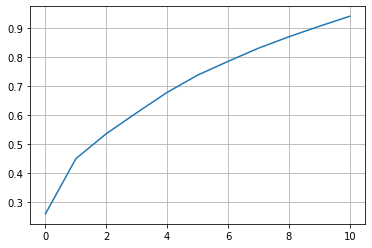

In [54]:
X=StandardScaler().fit_transform(X)

pca=PCA(n_components=11)

X_pca=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(exp_var)
cumsum_var
plt.plot(cumsum_var)
plt.grid()

,0,1,2,3,4,5,6
0,-0.359587,0.340241,-1.238237,-1.354741,-0.318165,1.153177,-1.635989
1,3.684590,0.621956,1.023224,0.904451,-0.246973,0.330649,-1.134456
2,-1.642241,-0.848086,1.367411,-0.750907,-0.437143,0.302514,1.174557


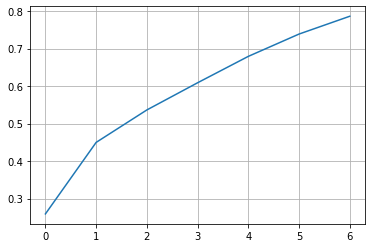

In [55]:
pca_new=PCA(n_components=7)
X_new=pca_new.fit_transform(X)

exp_var_new=pca_new.explained_variance_ratio_
cumsum_var_new=np.cumsum(exp_var_new)

plt.plot(cumsum_var_new)
plt.grid()
X_new=pd.DataFrame(X_new)
X_new.head(3)

Around 95% variance of the features can be explained by 11 components and over 75 percent of the variance can be explained by 5 components

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[162  12]
 [ 19  82]]


0.8872727272727273

In [58]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[163  11]
 [ 17  84]]


0.8981818181818182

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[149  25]
 [ 20  81]]


0.8363636363636363

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(classifier.get_params())

[[162  12]
 [ 28  73]]
0.8545454545454545
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


# If we check the accuracy, SVC model has performed better than other classification models, but we will update the models for better performance using hyperparameter tuning

# Hyperparameter tuning for Random Forests

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': [3,4,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500,1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [62]:
grid_search.fit(X_train, y_train)
grid_search.best_params_                                

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 10.9min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

# Hyperparameter tuning for SVC

In [63]:
param_grid = {'C':[0.01,0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] .

[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   30.8s finished


## It is important that we use cross validation here, to avoid any bias

# Checking accuracy(k-fold cv) with new params

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 10, max_features = 5, min_samples_leaf = 4,min_samples_split = 10,n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[157  17]
 [ 21  80]]


0.8618181818181818

In [65]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10)
print(accuracies.mean()*100)
accuracies.std()*100

86.58413461538463


4.083673345165452

With standard deviation 4.08, I can say that the lowest accuracy was at 82.5 and the highest accuracy was at 90.66

In [69]:
from sklearn.svm import SVC
classifier = SVC(C= 1,kernel = 'rbf', gamma = 0.1,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[163  11]
 [ 17  84]]


0.8981818181818182

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10)
print(accuracies.mean()*100)
accuracies.std()*100

88.14423076923077


2.720508213703536

With standard deviation 4.08, I can say that the lowest accuracy was at 85,42 and the highest accuracy was at 90.84

# Random Forests and SVC were our top algorithms and it was important to compare them at every step
# However, for the given problem, SVC algorithm has performed better than other algorithms